In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/home/sns002/Capstone/data/airbnb-listings_cleaned.csv', low_memory=False)

In [3]:
df.head(5)

,Last Scraped,Experiences Offered,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,2017-04-02,none,Lithal,2014-09-01,"Amsterdam, North Holland, Netherlands",within a day,50.0,Oud-West,1.0,1.0,...,9.0,8.0,9.0,10.0,10.0,9.0,strict,1.0,1.52,"Host Has Profile Pic,Host Identity Verified,Is..."
1,2017-04-02,none,Hein,2014-02-05,"Amsterdam, North Holland, The Netherlands",within a few hours,100.0,Oud-West,1.0,1.0,...,9.0,9.0,9.0,10.0,10.0,9.0,strict,1.0,0.81,"Host Is Superhost,Host Has Profile Pic,Host Id..."
2,2017-04-02,none,Matthieu,2014-11-12,"Amsterdam, North Holland, The Netherlands",Unknown,100.0,Oud-West,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1.0,0.05,"Host Has Profile Pic,Host Identity Verified,Is..."
3,2017-04-02,none,Bas,2013-10-05,"Amsterdam, North Holland, The Netherlands",within a day,100.0,Oud-West,1.0,1.0,...,10.0,9.0,10.0,9.0,9.0,9.0,flexible,1.0,0.62,"Host Has Profile Pic,Host Identity Verified,Is..."
4,2017-04-02,none,Pablo,2016-08-10,"Amsterdam, North Holland, Netherlands",within a day,100.0,Unknown,1.0,1.0,...,8.0,8.0,8.0,8.0,9.0,9.0,moderate,1.0,2.04,Host Has Profile Pic


In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_le = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_le[col] = df_le.groupby(col)['Price'].transform('mean')
datetime_column = df.select_dtypes(include=['datetime64']).columns
for col in datetime_column:
    df_le[col] = df_le[col].astype('int64') // 10**9

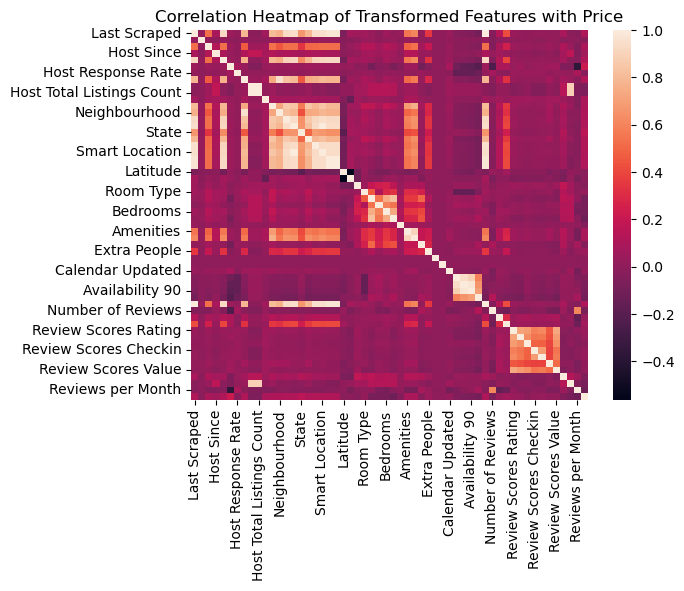

In [5]:
corr_matrix = df_le.corr()
sns.heatmap(corr_matrix)

# Set the title of the plot
plt.title('Correlation Heatmap of Transformed Features with Price', fontsize=12)
plt.show()

In [6]:
#Correlations of other variables with Target Variable called Price
price_corr = corr_matrix['Price'].abs().sort_values(ascending=False)
price_corr[1:31]

Amenities                 0.907915
Street                    0.758031
Neighbourhood Cleansed    0.651992
Smart Location            0.638312
City                      0.635525
Zipcode                   0.633972
Host Location             0.620323
Last Scraped              0.607303
Calendar last Scraped     0.606382
Country                   0.601125
Country Code              0.601125
Market                    0.598073
Host Neighbourhood        0.561459
Neighbourhood             0.548729
Host Name                 0.533299
State                     0.433570
Accommodates              0.353368
Bedrooms                  0.342576
Room Type                 0.302463
Last Review               0.283269
Beds                      0.278763
Bathrooms                 0.239089
Extra People              0.227692
Guests Included           0.185377
Host Since                0.138860
First Review              0.137706
Cancellation Policy       0.122511
Host Verifications        0.100864
Property Type       

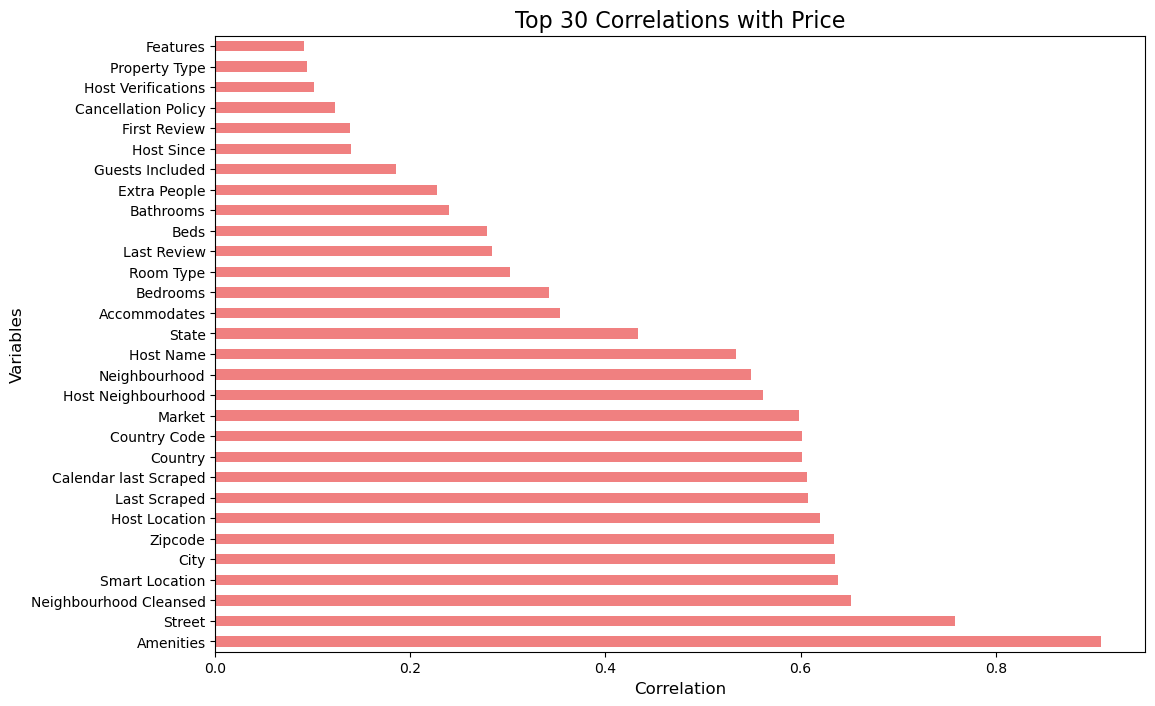

In [7]:
# Encode categorical features with mean price
categorical_cols = df.select_dtypes(include=['object']).columns
df_le = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_le[col] = df_le.groupby(col)['Price'].transform('mean')

# Convert datetime columns to integer format (seconds since epoch)
datetime_column = df.select_dtypes(include=['datetime64']).columns
for col in datetime_column:
    df_le[col] = df_le[col].astype('int64') // 10**9

# Compute the correlation matrix
corr_matrix = df_le.corr()

# Select the correlations of other variables with the target variable "Price"
price_corr = corr_matrix['Price'].abs().sort_values(ascending=False)

# Select top 30 correlations excluding the target variable itself
top_30_corr = price_corr[1:31]

# Plot the correlation bar chart
plt.figure(figsize=(12, 8))
top_30_corr.plot(kind='barh', color='lightcoral')
plt.title('Top 30 Correlations with Price', fontsize=16)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.show()

In [8]:
#Splitting data for Feature Importances
X = df_le.drop('Price', axis=1)
y = df_le['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [9]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [10]:
rf_im_df = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
print('Random Forest Feature Importance:')
print(rf_im_df.head(20))

Random Forest Feature Importance:
                   feature  importance
30               Amenities    0.822539
11                  Street    0.078180
2                Host Name    0.010671
27                Bedrooms    0.005981
21                Latitude    0.005965
25            Accommodates    0.005364
24               Room Type    0.005277
26               Bathrooms    0.004330
22               Longitude    0.003966
3               Host Since    0.003284
35        Calendar Updated    0.003195
42            First Review    0.002639
13  Neighbourhood Cleansed    0.002601
43             Last Review    0.002438
16                 Zipcode    0.002405
4            Host Location    0.002396
10      Host Verifications    0.002223
39        Availability 365    0.002012
28                    Beds    0.001922
41       Number of Reviews    0.001911
